In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import files
uploaded = files.upload()


Mounted at /content/drive


Saving musicData.csv to musicData.csv


In [ ]:
NYU_N_number = 10125099

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import random
random.seed(NYU_N_number)


### Loading Dataset

In [ ]:
# Load the dataset
data = pd.read_csv("musicData.csv")

In [ ]:
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


#### Summary statistics of the dataset

In [ ]:
# Summary statistics of the dataset
print("\nSummary statistics of the dataset:")
data.describe()


Summary statistics of the dataset:


,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,55888.396360,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,0.456264
std,20725.256253,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,0.161637,6.162990,0.101373,0.247119
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,37973.500000,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,0.257000
50%,55913.500000,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,0.448000
75%,73863.250000,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


#### Handling Missing values in the dataset

In [ ]:
# Check for missing values
print("\nMissing values in the dataset:")
data.isnull().sum()


Missing values in the dataset:


instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64

In [ ]:
# Calculate percentage of missing values in each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Display the percentage of missing values
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
instance_id         0.009999
artist_name         0.009999
track_name          0.009999
popularity          0.009999
acousticness        0.009999
danceability        0.009999
duration_ms         0.009999
energy              0.009999
instrumentalness    0.009999
key                 0.009999
liveness            0.009999
loudness            0.009999
mode                0.009999
speechiness         0.009999
tempo               0.009999
obtained_date       0.009999
valence             0.009999
music_genre         0.009999
dtype: float64


In [ ]:
# Calculate total number of missing values in the dataset
total_missing = data.isnull().sum().sum()

# Calculate total number of values in the dataset
total_values = data.size

# Calculate overall percentage of missing values
overall_missing_percentage = (total_missing / total_values) * 100

# Display the overall percentage of missing values
print("Overall percentage of missing values in the dataset:", overall_missing_percentage)

Overall percentage of missing values in the dataset: 0.009999000099990002


`From above stats, the overal percentage of missing values is 0.0099, apprx. 0.01, droppimg this wont affect the Dataset distribution`

In [ ]:
clean_data = data.dropna()
# Check for missing values
print("\nMissing values in the dataset:")
clean_data.isnull().sum()


Missing values in the dataset:


instance_id         0
artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
obtained_date       0
valence             0
music_genre         0
dtype: int64

#### A view Data types

In [ ]:
data = clean_data.copy()

data.dtypes

instance_id         float64
artist_name          object
track_name           object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo                object
obtained_date        object
valence             float64
music_genre          object
dtype: object

#### Converting columns to correct data types

In [ ]:
# Convert columns to correct data types
data['instance_id'] = data['instance_id'].astype(int)
data['popularity'] = data['popularity'].astype(float)
data['acousticness'] = data['acousticness'].astype(float)
data['danceability'] = data['danceability'].astype(float)
data['duration_ms'] = data['duration_ms'].astype(float)
data['energy'] = data['energy'].astype(float)
data['instrumentalness'] = data['instrumentalness'].astype(float)
data['liveness'] = data['liveness'].astype(float)
data['loudness'] = data['loudness'].astype(float)
data['speechiness'] = data['speechiness'].astype(float)
data['valence'] = data['valence'].astype(float)

In [ ]:
# Convert 'tempo' column to float
data['artist_name'] = data['artist_name'].astype(str)
data['track_name'] = data['track_name'].astype(str)
data['key'] = data['key'].astype(str)
data['music_genre'] = data['music_genre'].astype(str)

data['obtained_date'] = pd.to_datetime(data['obtained_date'], errors='coerce', format='%d-%b', infer_datetime_format=True)


data['month'] = data['obtained_date'].dt.month
data['day'] = data['obtained_date'].dt.day

# Drop the original datetime column
data.drop(columns=['obtained_date'], inplace=True)



<ipython-input-16-310102077e90>:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['obtained_date'] = pd.to_datetime(data['obtained_date'], errors='coerce', format='%d-%b', infer_datetime_format=True)


In [ ]:
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre,month,day
0,32894,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic,4.0,4.0
1,46652,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic,4.0,4.0
2,30097,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic,4.0,4.0
3,62177,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic,4.0,4.0
4,24907,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic,4.0,4.0


In [ ]:
data.dtypes

instance_id           int64
artist_name          object
track_name           object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo                object
valence             float64
music_genre          object
month               float64
day                 float64
dtype: object

In [ ]:
data.head(10)

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre,month,day
0,32894,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.792000,A#,0.1150,-5.201,Minor,0.0748,100.889,0.759,Electronic,4.0,4.0
1,46652,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.950000,D,0.1240,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic,4.0,4.0
2,30097,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.011800,G#,0.5340,-4.617,Major,0.0345,127.994,0.333,Electronic,4.0,4.0
3,62177,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.002530,C#,0.1570,-4.498,Major,0.2390,128.014,0.270,Electronic,4.0,4.0
4,24907,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.909000,F#,0.1570,-6.266,Major,0.0413,145.036,0.323,Electronic,4.0,4.0
5,89064,Axel Boman,Hello,47.0,0.00523,0.755,519468.0,0.731,0.854000,D,0.2160,-10.517,Minor,0.0412,?,0.614,Electronic,4.0,4.0
6,43760,Jordan Comolli,Clash,46.0,0.02890,0.572,214408.0,0.803,0.000008,B,0.1060,-4.294,Major,0.3510,149.995,0.230,Electronic,4.0,4.0
7,30738,Hraach,Delirio,43.0,0.02970,0.809,416132.0,0.706,0.903000,G,0.0635,-9.339,Minor,0.0484,120.008,0.761,Electronic,4.0,4.0
8,84950,Kayzo,NEVER ALONE,39.0,0.00299,0.509,292800.0,0.921,0.000276,F,0.1780,-3.175,Minor,0.2680,149.94799999999998,0.273,Electronic,4.0,4.0
9,56950,Shlump,Lazer Beam,22.0,0.00934,0.578,204800.0,0.731,0.011200,A,0.1110,-7.091,Minor,0.1730,139.933,0.203,Electronic,4.0,4.0


In [ ]:
def count_problematic_values(column):
    problematic_count = 0
    for value in column:
        if isinstance(value, str):
            try:
                float_value = float(value)
            except ValueError:
                problematic_count += 1
    return problematic_count

print(count_problematic_values(data['tempo']))

4980


Some numeric columns have values that are strings, like, i have noticed tempo is numeric but we have existing '?' valure in almost 4980 rows, the below function is used to check any problematics values

In [ ]:
# List of numeric columns
numeric_columns = ['instance_id', 'popularity', 'acousticness', 'danceability',
                   'duration_ms', 'energy', 'instrumentalness', 'liveness',
                   'loudness', 'speechiness', 'valence','tempo']

In [ ]:
for col in numeric_columns:
    print(col,count_problematic_values(data[col]))

data.shape

instance_id 0
popularity 0
acousticness 0
danceability 0
duration_ms 0
energy 0
instrumentalness 0
liveness 0
loudness 0
speechiness 0
valence 0
tempo 4980


(50000, 19)

To handle the problematic values in tempo,  we can convert to numeric and inppute the missing values with Median

In [ ]:
# Convert 'tempo' column to numeric
data['tempo'] = pd.to_numeric(data['tempo'], errors='coerce')

# Calculate median tempo
median_tempo = data['tempo'].median()

# Impute missing values in 'tempo' column with median tempo
data['tempo'].fillna(median_tempo, inplace=True)

# Display the first few rows to verify the changes
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre,month,day
0,32894,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic,4.0,4.0
1,46652,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,0.531,Electronic,4.0,4.0
2,30097,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic,4.0,4.0
3,62177,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic,4.0,4.0
4,24907,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic,4.0,4.0


Further Conversion

In [ ]:
####
# Select string columns
string_columns = data.select_dtypes(include=['object']).columns

# Convert values in string columns to lowercase
data[string_columns] = data[string_columns].apply(lambda x: x.str.lower())

# Display the first few rows to verify the changes
data.head()


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre,month,day
0,32894,röyksopp,röyksopp's night out,27.0,0.00468,0.652,-1.0,0.941,0.79200,a#,0.115,-5.201,minor,0.0748,100.889,0.759,electronic,4.0,4.0
1,46652,thievery corporation,the shining path,31.0,0.01270,0.622,218293.0,0.890,0.95000,d,0.124,-7.043,minor,0.0300,115.002,0.531,electronic,4.0,4.0
2,30097,dillon francis,hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,g#,0.534,-4.617,major,0.0345,127.994,0.333,electronic,4.0,4.0
3,62177,dubloadz,nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,c#,0.157,-4.498,major,0.2390,128.014,0.270,electronic,4.0,4.0
4,24907,what so not,divide & conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,f#,0.157,-6.266,major,0.0413,145.036,0.323,electronic,4.0,4.0


In [ ]:
unique_genres = data['music_genre'].unique()
print(unique_genres)


['electronic' 'anime' 'jazz' 'alternative' 'country' 'rap' 'blues' 'rock'
 'classical' 'hip-hop']


In [ ]:
data.columns

Index(['instance_id', 'artist_name', 'track_name', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence', 'music_genre', 'month', 'day'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['music_genre'] = label_encoder.fit_transform(data['music_genre'])
data['key'] = data['key'].astype('category').cat.codes
data['artist_name'] = data['artist_name'].astype('category').cat.codes
data['track_name'] = data['track_name'].astype('category').cat.codes
data['mode'] = data['mode'].astype('category').cat.codes


In [ ]:
unique_genres = data['music_genre'].unique()
print(unique_genres)

[5 1 7 0 4 8 2 9 3 6]


In [ ]:
genre = ['electronic','anime','jazz','alternative','country','rap','blues','rock','classical','hip-hop']

genre_index = [5,1,7,0,4,8,2,9,3,6]

genre_dict = dict(zip(genre, genre_index))

genre_dict

{'electronic': 5,
 'anime': 1,
 'jazz': 7,
 'alternative': 0,
 'country': 4,
 'rap': 8,
 'blues': 2,
 'rock': 9,
 'classical': 3,
 'hip-hop': 6}

### Data Distribution:

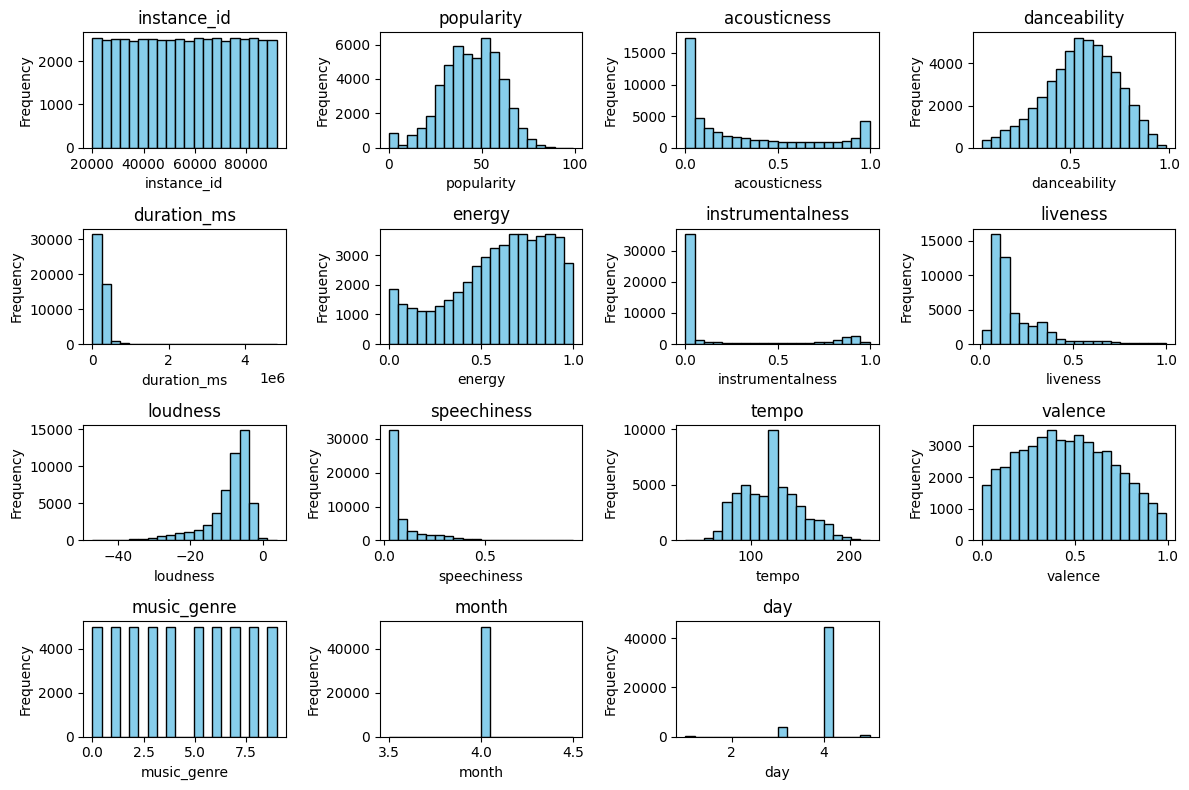

In [ ]:
import matplotlib.pyplot as plt

# Select numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

def histos(data,numeric_columns):
    # Plot histograms for numeric variables
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(numeric_columns.columns):
        plt.subplot(4, 4, i + 1)
        plt.hist(data[col], bins=20, color='skyblue', edgecolor='black')
        plt.title(col)
        plt.xlabel(col)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

histos(data,numeric_columns)


In [ ]:
def impute_outliers(data, column, method='median'):
    """
    Impute outliers in a given column of the dataset.

    Parameters:
        data (DataFrame): The dataset containing the column with outliers.
        column (str): The name of the column containing outliers.
        method (str): The method used for imputation ('mean' or 'median'). Default is 'median'.

    Returns:
        DataFrame: The dataset with outliers imputed in the specified column.
    """
    # Calculate quartiles
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    # Calculate interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Impute outliers based on method
    if method == 'mean':
        replacement_value = data[column].mean()
    else:
        replacement_value = data[column].median()

    # Impute outliers with replacement value
    data.loc[(data[column] < lower_bound) | (data[column] > upper_bound), column] = replacement_value

    return data


In [ ]:
def impute_outliers_zscore(data, column, threshold=3, method='median'):
    """
    Impute outliers in a given column of the dataset using Z-scores.

    Parameters:
        data (DataFrame): The dataset containing the column with outliers.
        column (str): The name of the column containing outliers.
        threshold (float): The threshold value for Z-score. Data points with Z-score
            greater than this threshold will be considered outliers. Default is 3.
        method (str): The method used for imputation ('mean' or 'median'). Default is 'median'.

    Returns:
        DataFrame: The dataset with outliers imputed in the specified column.
    """
    # Calculate mean and standard deviation
    mean = data[column].mean()
    std = data[column].std()

    # Calculate Z-scores
    z_scores = (data[column] - mean) / std

    # Impute outliers based on Z-scores
    if method == 'mean':
        replacement_value = mean
    else:
        replacement_value = data[column].median()

    data.loc[abs(z_scores) > threshold, column] = replacement_value

    return data


In [ ]:
for col in numeric_columns:
    data =  impute_outliers_zscore(data, col, threshold=3)


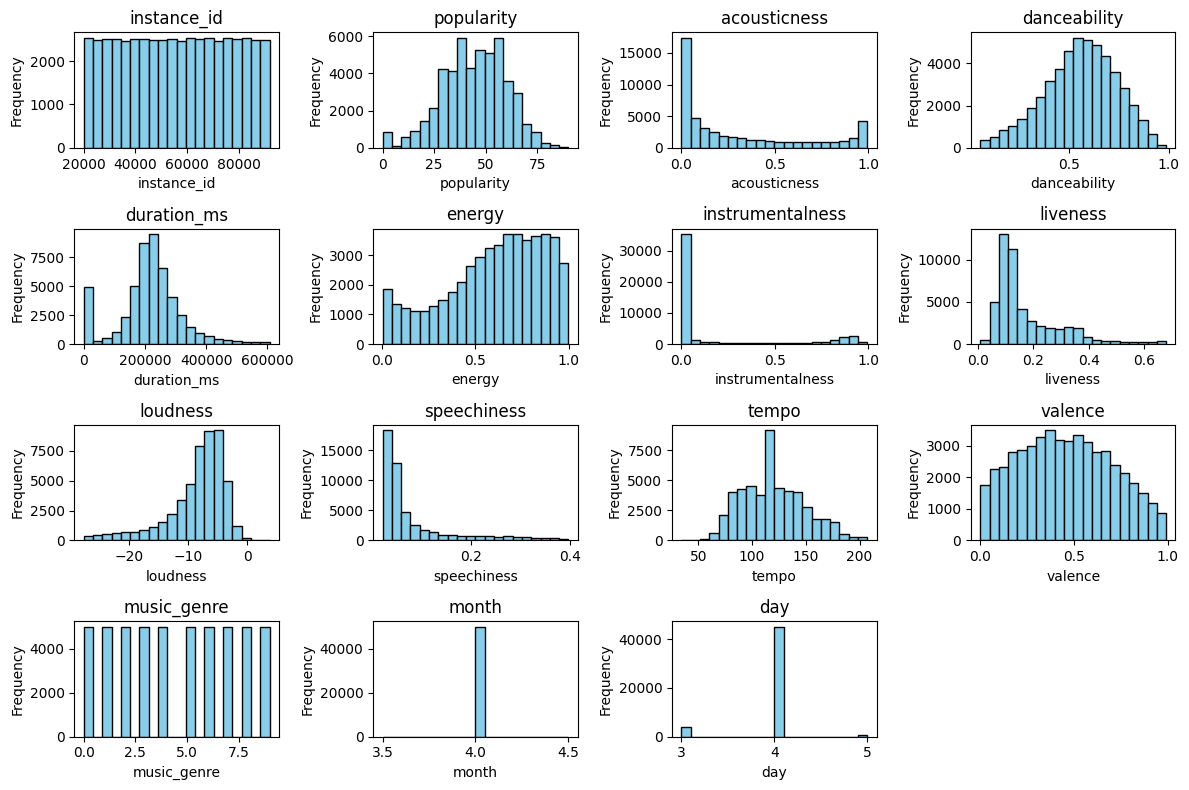

In [ ]:
histos(data,numeric_columns)

### Apply log transformation to skewed distributions

In [ ]:
import numpy as np
# Apply log transformation to skewed distributions
skewed_columns = ['acousticness', 'instrumentalness', 'liveness', 'speechiness']
for column in skewed_columns:
    data[column] = np.log1p(data[column])

In [ ]:
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre,month,day
0,32894.0,5113,28270,27.0,0.004669,0.652,-1.0,0.941,0.583332,1,0.108854,-5.201,1,0.072135,100.889,0.759,5.0,4.0,4.0
1,46652.0,6191,34657,31.0,0.012620,0.622,218293.0,0.890,0.667829,5,0.116894,-7.043,1,0.029559,115.002,0.531,5.0,4.0,4.0
2,30097.0,1587,14969,28.0,0.003055,0.620,215613.0,0.755,0.011731,11,0.427879,-4.617,0,0.033918,127.994,0.333,5.0,4.0,4.0
3,62177.0,1732,23255,34.0,0.025083,0.774,166875.0,0.700,0.002527,4,0.145830,-4.498,0,0.214305,128.014,0.270,5.0,4.0,4.0
4,24907.0,6614,8600,32.0,0.004639,0.638,222369.0,0.587,0.646580,9,0.145830,-6.266,0,0.040470,145.036,0.323,5.0,4.0,4.0


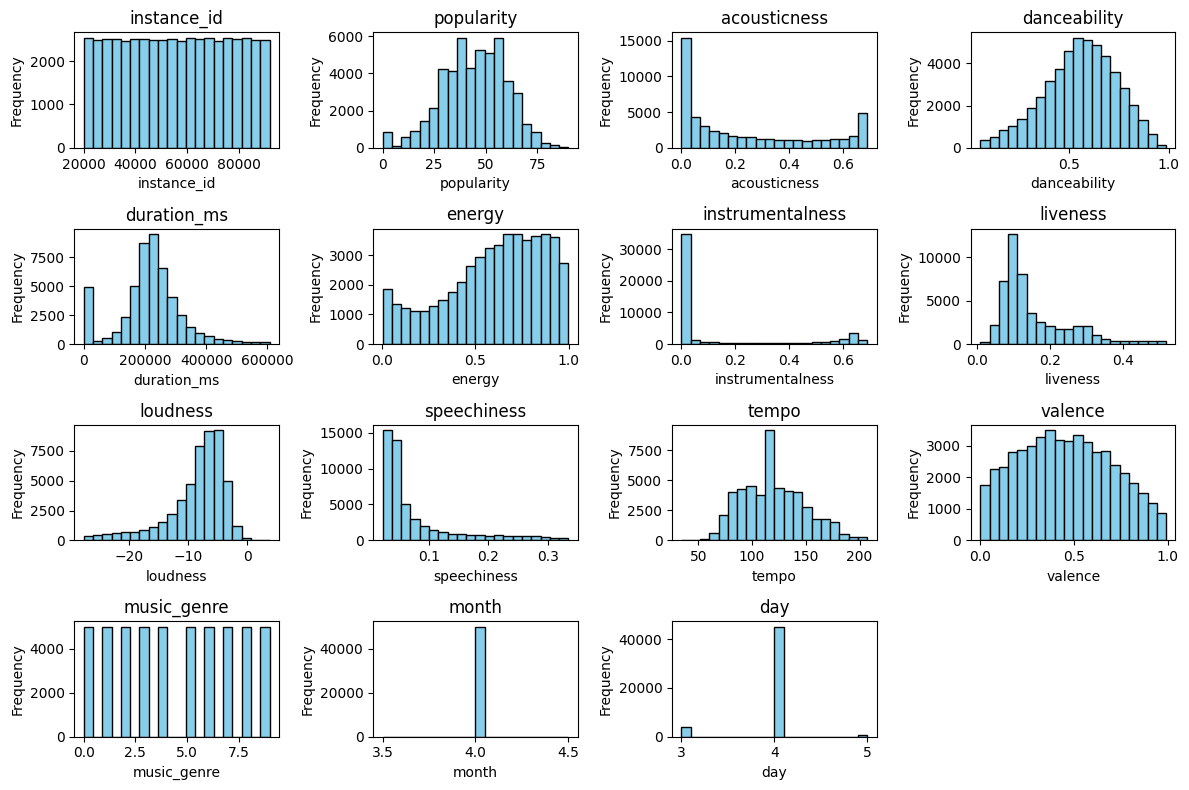

In [ ]:
histos(data,numeric_columns)

In [ ]:
data.shape

(50000, 19)

Correlation

In [ ]:
numeric_columns

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,music_genre,month,day
0,32894,27.0,0.00468,0.652,-1.0,0.941,0.79200,0.115,-5.201,0.0748,100.889,0.759,5,4.0,4.0
1,46652,31.0,0.01270,0.622,218293.0,0.890,0.95000,0.124,-7.043,0.0300,115.002,0.531,5,4.0,4.0
2,30097,28.0,0.00306,0.620,215613.0,0.755,0.01180,0.534,-4.617,0.0345,127.994,0.333,5,4.0,4.0
3,62177,34.0,0.02540,0.774,166875.0,0.700,0.00253,0.157,-4.498,0.2390,128.014,0.270,5,4.0,4.0
4,24907,32.0,0.00465,0.638,222369.0,0.587,0.90900,0.157,-6.266,0.0413,145.036,0.323,5,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878,59.0,0.03340,0.913,-1.0,0.574,0.00000,0.119,-7.022,0.2980,98.028,0.330,6,4.0,4.0
50001,43557,72.0,0.15700,0.709,251860.0,0.362,0.00000,0.109,-9.814,0.0550,122.043,0.113,6,4.0,4.0
50002,39767,51.0,0.00597,0.693,189483.0,0.763,0.00000,0.143,-5.443,0.1460,131.079,0.395,6,4.0,4.0
50003,57944,65.0,0.08310,0.782,262773.0,0.472,0.00000,0.106,-5.016,0.0441,75.886,0.354,6,4.0,4.0


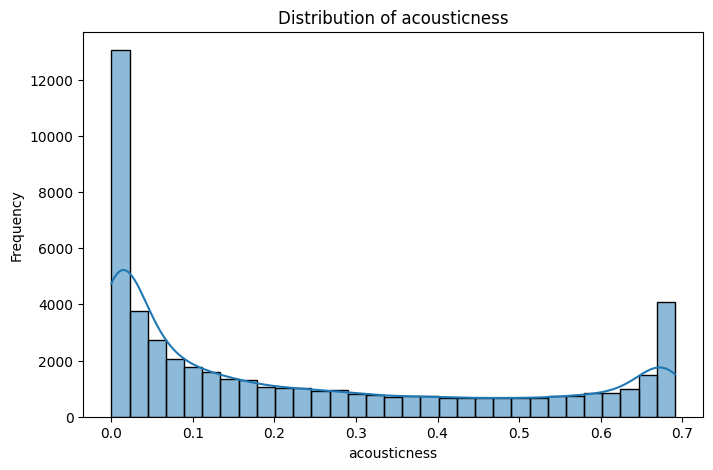

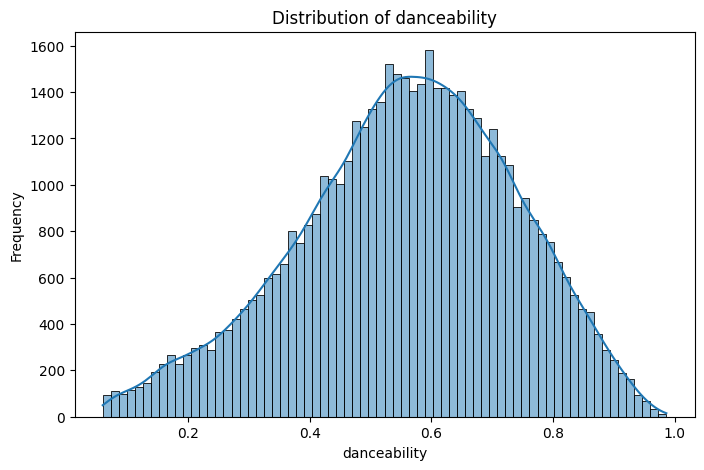

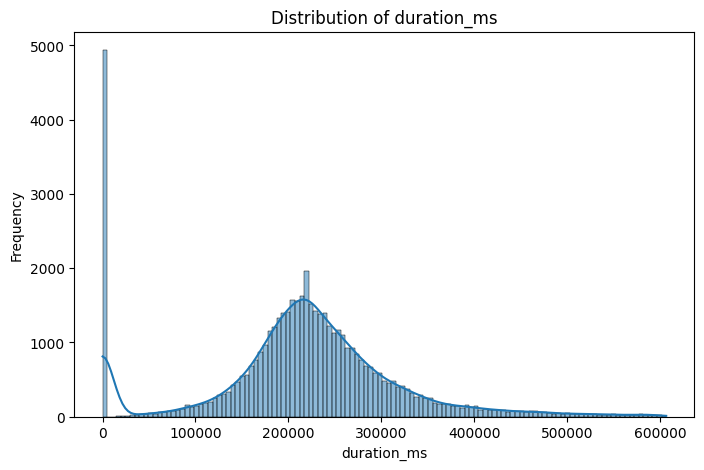

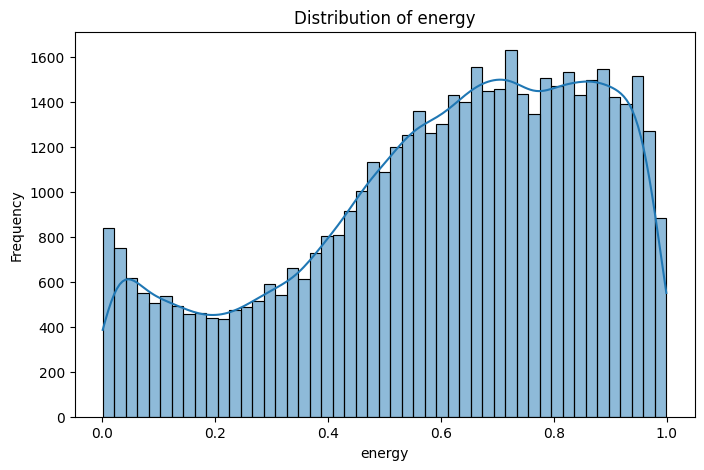

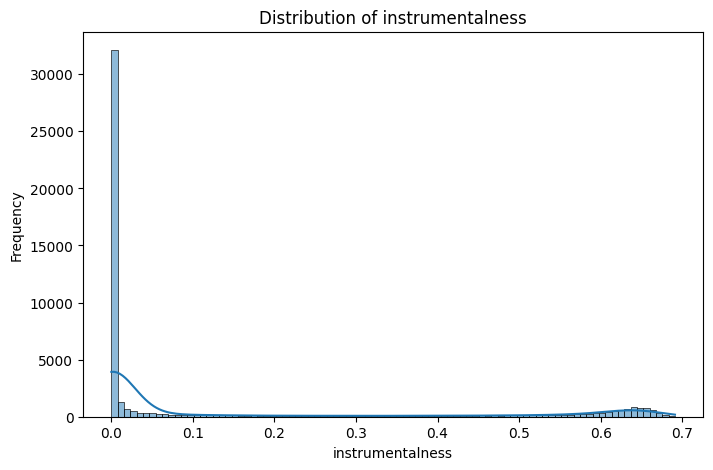

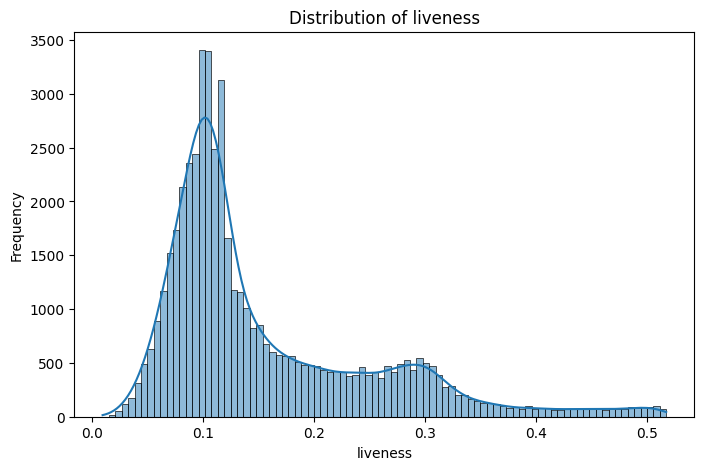

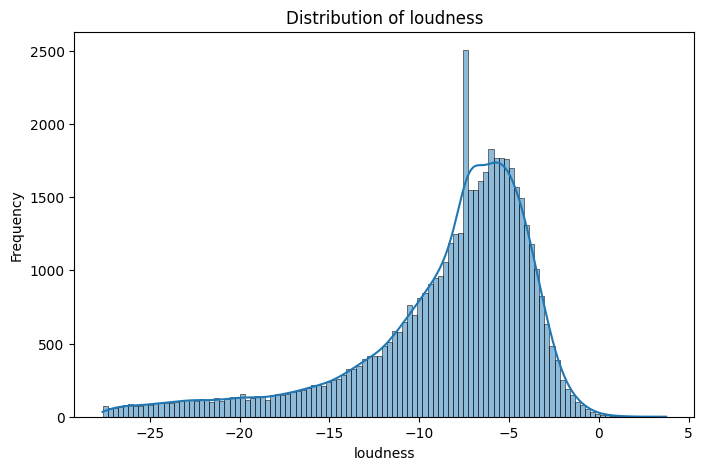

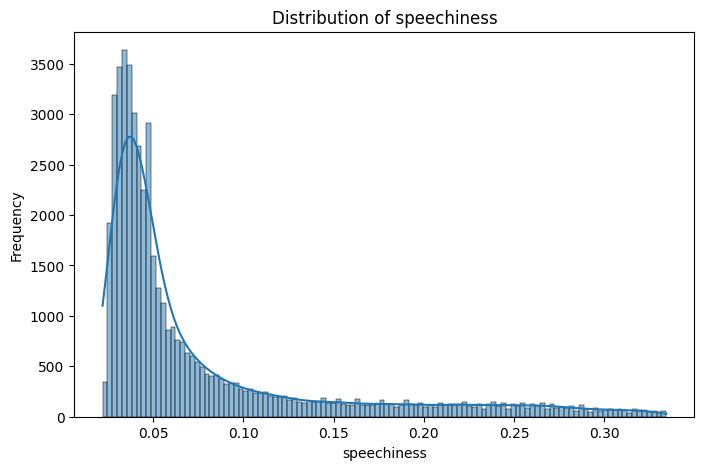

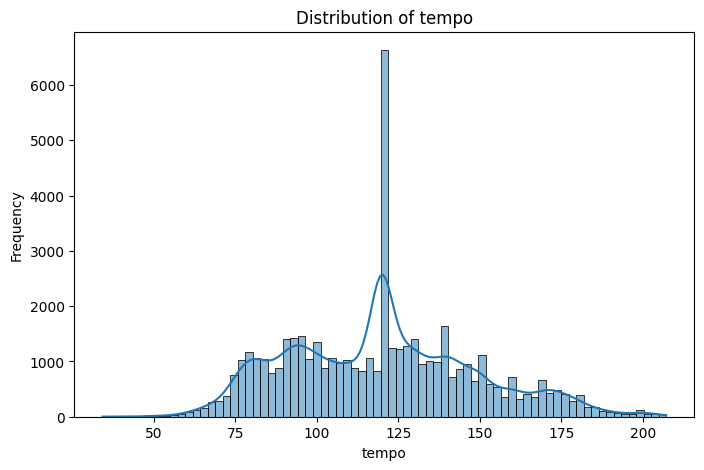

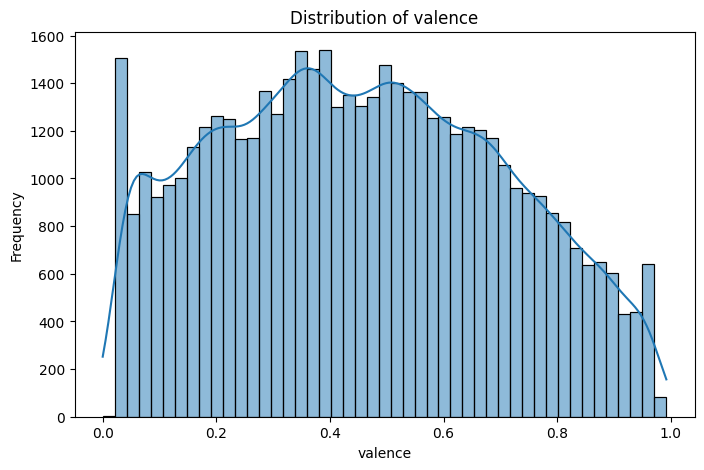

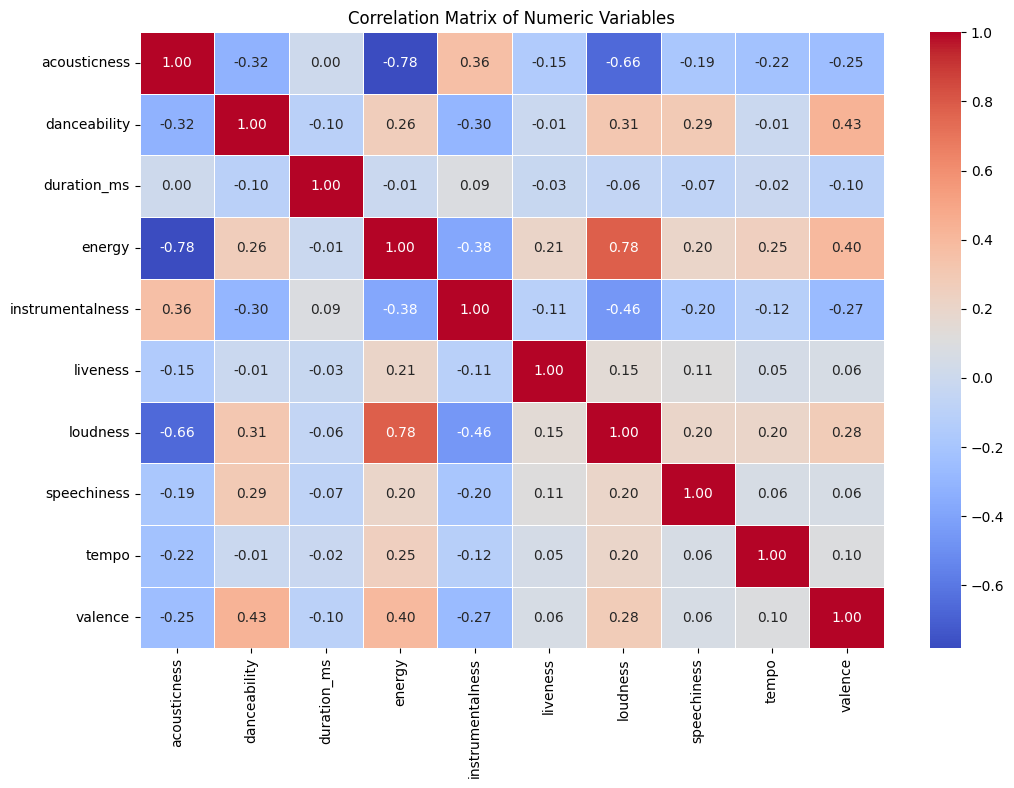

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize distribution of acoustic features
numeric_columns = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Calculate pairwise correlations
correlation_matrix = data[numeric_columns].corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


### Feature Importance

In [ ]:
# Check for missing values
print("\nMissing values in the dataset:")
data = data.dropna()
data.isnull().sum()



Missing values in the dataset:


instance_id         0
artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
music_genre         0
month               0
day                 0
dtype: int64

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Split the data into features and target variable
X = data.drop(columns=['music_genre','instance_id','track_name'])
y = data['music_genre']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=NYU_N_number)

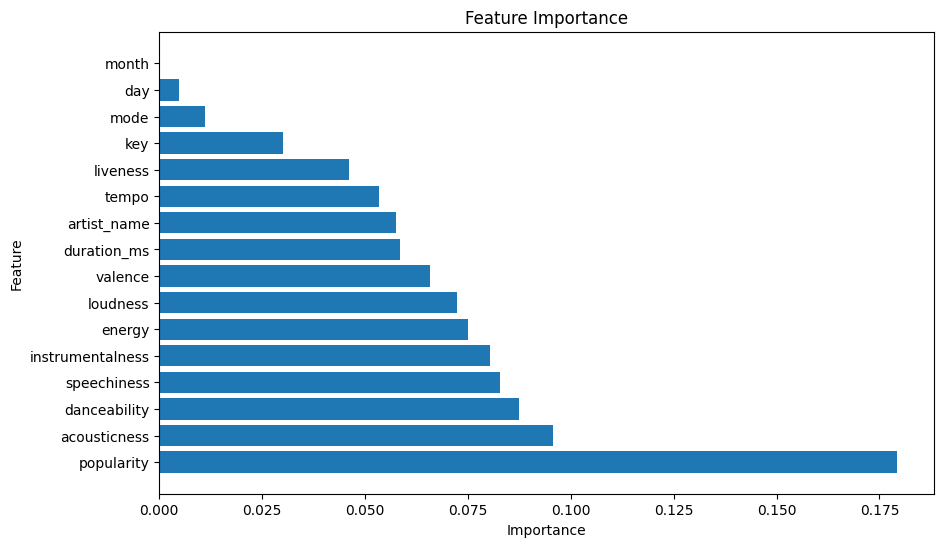

In [ ]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [ ]:
clean_data = data.dropna()
# Check for missing values
print("\nMissing values in the dataset:")
clean_data.isnull().sum()


Missing values in the dataset:


instance_id         0
artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
music_genre         0
month               0
day                 0
dtype: int64

## Splitting Dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC

data = clean_data.copy()

# Group the data by genre
genre_groups = data.groupby('music_genre')

# Initialize lists to store train and test data
X_train_list, X_test_list, y_train_list, y_test_list = [], [], [], []

# Loop through each genre
for genre, group_data in genre_groups:
    # Split data into training and test sets for the current genre
    X_genre_train, X_genre_test, y_genre_train, y_genre_test = train_test_split(
        group_data.drop(columns=['music_genre']),
        group_data['music_genre'],
        test_size=500,
        random_state=NYU_N_number
    )
    # Add the split data to the lists
    X_train_list.append(X_genre_train)
    X_test_list.append(X_genre_test)
    y_train_list.append(y_genre_train)
    y_test_list.append(y_genre_test)

# Concatenate the train and test sets
X_train = pd.concat(X_train_list)
X_test = pd.concat(X_test_list)
y_train = pd.concat(y_train_list)
y_test = pd.concat(y_test_list)


In [ ]:
X_test.shape

(5000, 18)

## Trainning the Model

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Selecting top important features
top_features = importance_df.head(10)['Feature']  # Select top 10 important features, adjust as needed

# Extract important features from the training and test data
X_train_imp = X_train[top_features]
X_test_imp = X_test[top_features]


### KNN

In [ ]:
# Selecting top important features for Random Forest
top_features_rf = importance_df.head(6)['Feature']  # Select top 5 important features, adjust as needed

In [ ]:
# Extract important features from the training and test data for Random Forest
X_train_imp_rf = X_train[top_features_rf]
X_test_imp_rf = X_test[top_features_rf]



# Apply SMOTE to balance the classes in the training data
smote = SMOTE(random_state=NYU_N_number)
X_train_resampled_rf, y_train_resampled_rf = smote.fit_resample(X_train_imp_rf, y_train)


### Finding Optimal k

In [ ]:
from sklearn.model_selection import cross_val_score

# Define a range of values for k
k_values = [1, 3, 5, 7, 9]

# Initialize an empty list to store cross-validation scores for each value of k
cv_scores = []

# Perform k-fold cross-validation for each value of k
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_classifier, X_train_resampled_rf, y_train_resampled_rf, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the optimal value of k with the highest cross-validation score
optimal_k = k_values[cv_scores.index(max(cv_scores))]
print("Optimal k:", optimal_k)


Optimal k: 9


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=optimal_k)

In [ ]:
# Train the classifier
knn_classifier.fit(X_train_resampled_rf, y_train_resampled_rf)

# Predict on the test set
y_pred = knn_classifier.predict(X_test_imp_rf)



In [ ]:
# Get predicted probabilities for each class
y_prob = knn_classifier.predict_proba(X_test_imp_rf)

# Calculate ROC AUC score with averaging
roc_auc_micro = roc_auc_score(y_test, y_prob, multi_class='ovo')
print("ROC AUC:", roc_auc_micro)


ROC AUC: 0.8576716666666666


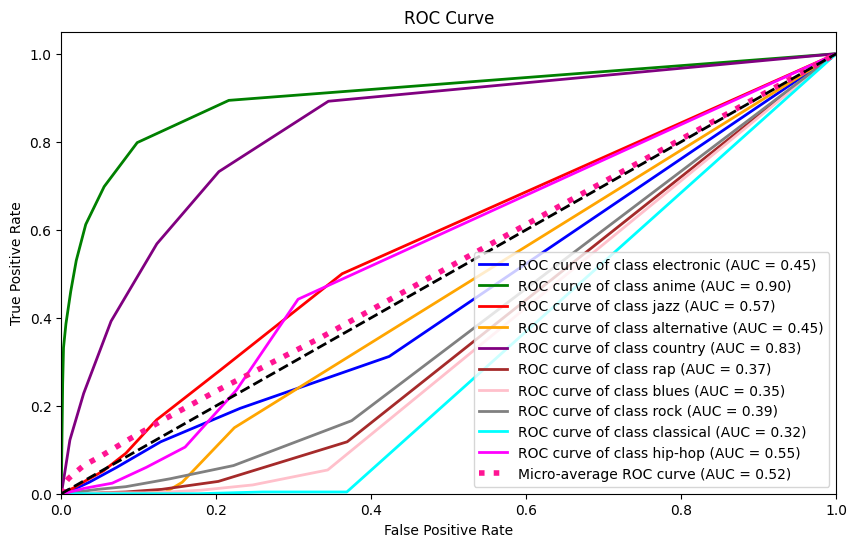

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Define the genre names and their corresponding indices
genre_names = ['electronic', 'anime', 'jazz', 'alternative', 'country', 'rap', 'blues', 'rock', 'classical', 'hip-hop']
genre_index = [5, 1, 7, 0, 4, 8, 2, 9, 3, 6]


# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=genre_index)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(genre_index)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_prob.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curve
plt.figure(figsize=(10, 6))
colors = cycle(['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta'])
for i, color in zip(range(len(genre_index)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (AUC = {1:0.2f})'.format(genre_names[i], roc_auc[i]))

plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle=':', linewidth=4,
         label='Micro-average ROC curve (AUC = {0:0.2f})'.format(roc_auc_micro))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Print ROC AUC for each class
for i in range(len(genre_index)):
    print("ROC AUC for class", genre_names[i], ":", roc_auc[i])


ROC AUC for class electronic : 0.4501511111111111
ROC AUC for class anime : 0.904536
ROC AUC for class jazz : 0.5666193333333334
ROC AUC for class alternative : 0.4528797777777777
ROC AUC for class country : 0.8298139999999999
ROC AUC for class rap : 0.36675266666666667
ROC AUC for class blues : 0.3508091111111111
ROC AUC for class rock : 0.3882313333333333
ROC AUC for class classical : 0.31764133333333333
ROC AUC for class hip-hop : 0.5457702222222223


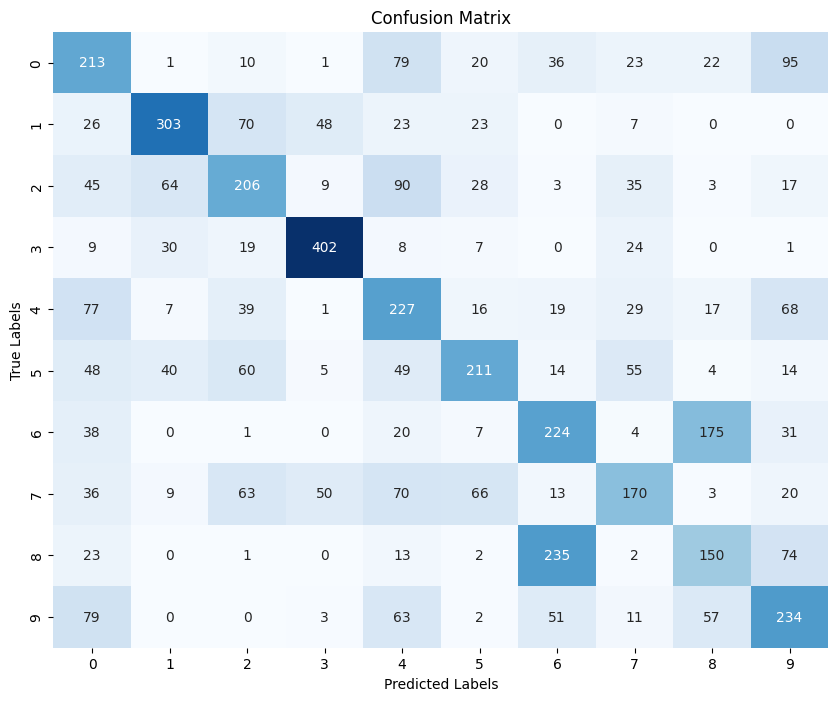

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
